## Import Libraries 

In [1]:
import pandas as pd
import numpy as np

## Load Dataset

In [2]:
df=pd.read_csv("athlete_events.csv")
region_df=pd.read_csv("noc_regions.csv")

In [3]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [4]:
df.shape

(271116, 15)

## We filter the season from df only work with summer

In [5]:
df=df[df['Season']=='Summer']

In [6]:
df.shape

(222552, 15)

In [7]:
region_df.tail()

,NOC,region,notes
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN
229,ZIM,Zimbabwe,NaN


In [8]:
## Add resion on the df set that help us to find some information
df=df.merge(region_df,on='NOC',how='left')

In [9]:
df.head() # So region column add in this dataframe df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


In [10]:
df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [11]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [12]:
df.duplicated().sum() # There are 1385 rows are duplicate.

1385

In [13]:
# We romove the duplicate records.
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum() # Now all duplicate records are removed.

0

In [15]:
df['Medal'].value_counts()

Gold      11456
Bronze    11409
Silver    11212
Name: Medal, dtype: int64

In [16]:
# Now use One Hot Encoding
a=pd.get_dummies(df['Medal'])
a

,Bronze,Gold,Silver
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0
...,...,...,...
222547,0,0,0
222548,0,0,0
222549,0,0,0
222550,0,0,0


In [17]:
df.shape

(221167, 17)

In [18]:
df=pd.concat([df,a],axis=1)

In [19]:
df.shape # Now added 3 columns that are Gold ,Solver and Bronze

(221167, 20)

In [20]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
# But this table is wrong .Because in a team match for example Hockey if team win Gold then it counts 
# How many players are that team so they give total Gold medal.

C:\Users\user\AppData\Local\Temp\ipykernel_2716\826191765.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()


,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454
...,...,...,...,...
225,AHO,0,1,0
226,LBR,0,0,0
227,LCA,0,0,0
228,LES,0,0,0


In [21]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
222551,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN,Belarus,NaN,0,0,0


In [22]:
df.shape

(221167, 20)

In [23]:
Medal_Tally=df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
# Here we remove that all records that counts many time in medal total.

In [24]:
Medal_Tally.shape

(105636, 20)

In [25]:
Medal_Tally=Medal_Tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

C:\Users\user\AppData\Local\Temp\ipykernel_2716\200903675.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Medal_Tally=Medal_Tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()


In [26]:
Medal_Tally['Total']=Medal_Tally['Gold']+Medal_Tally['Silver']+Medal_Tally['Bronze']

In [27]:
Medal_Tally[Medal_Tally['region']=='IND']

,region,Gold,Silver,Bronze,Total


In [28]:
Medal_Tally

,region,Gold,Silver,Bronze,Total
0,USA,1035,802,708,2545
1,Russia,592,498,487,1577
2,Germany,444,457,491,1392
3,UK,278,317,300,895
4,France,234,256,287,777
...,...,...,...,...,...
200,Lesotho,0,0,0,0
201,Albania,0,0,0,0
202,Libya,0,0,0,0
203,Liechtenstein,0,0,0,0


In [29]:
years=df['Year'].unique().tolist()

In [30]:
years.sort()

In [31]:
years.insert(0,'Overall')

In [32]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [33]:
country=np.unique(df['region'].dropna().values).tolist()

In [34]:
country.sort()

In [35]:
country.insert(0,'Overall')

In [36]:
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

## Now input for selected year and country

In [37]:
def fetch_medal_tally(df,year,country):
    medal_df=df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
    flag=0
    if year=='Overall' and country=='Overall':
        temp_df=medal_df
    if year=='Overall' and country!='Overall':
        flag=1
        temp_df=medal_df[medal_df['region']==country]
    if year!='Overall' and country=='Overall':
        temp_df=medal_df[medal_df['Year']==year]
    if year!='Overall' and country!='Overall':
        temp_df=(medal_df[medal_df['Year']==year]) & (medal_df[medal_df['region']==country])
    
    if flag==1:
        x=temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year',ascending=True).reset_index()
    else:
        x=temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Year',ascending=True).reset_index()
    x['Total']=x['Gold']+x['Silver']+x['Bronze']
    print(x)

NameError: name 'x' is not defined

In [38]:
#x2=x

In [39]:
#x2.set_index('Year',inplace=True)

In [40]:
#x2

In [41]:
#x['Total']=x['Gold']+x['Silver']+x['Bronze']
#x1=x2
#sum = x2.sum()
#sum.name ='Overall_Total'
        #Assign sum of all rows of DataFrame as a new Row
#x1 = x1.append(sum.transpose())

## Overall Analysis

In [42]:
medal_df=df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
medal_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222528,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,Russia,NaN,0,0,1
222530,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,Russia,NaN,1,0,0
222536,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 100 metres Butterfly,NaN,Poland,NaN,0,0,0
222537,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 200 metres Butterfly,NaN,Poland,NaN,0,0,0


#####  . No. of addition  . No. of city  . No.of events/sports  . No. of athlete

In [43]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [44]:
df['Year'].unique()

array([1992, 2012, 1920, 1900, 1932, 1952, 2000, 1996, 1912, 1924, 1948,
       2008, 2016, 2004, 1984, 1968, 1972, 1988, 1936, 1956, 1960, 1928,
       1976, 1980, 1964, 1906, 1904, 1908, 1896], dtype=int64)

In [45]:
df['Year'].unique().shape[0] - 1 # -1 for 1906 it is not counted

28

In [46]:
df['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [47]:
df['City'].unique().shape

(23,)

In [48]:
df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [49]:
df['Sport'].unique().shape

(52,)

In [50]:
df['Event'].unique()

array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Athletics Women's 100 metres",
       "Athletics Women's 4 x 100 metres Relay",
       "Swimming Men's 400 metres Freestyle", "Badminton Men's Singles",
       "Sailing Women's Windsurfer",
       "Swimming Men's 200 metres Breaststroke",
       "Swimming Men's 400 metres Breaststroke",
       "Gymnastics Men's Individual All-Around",
       "Gymnastics Men's Team All-Around",
       "Gymnastics Men's Floor Exercise", "Gymnastics Men's Horse Vault",
       "Gymnastics Men's Parallel Bars",
       "Gymnastics Men's Horizontal Bar", "Gymnastics Men's Rings",
       "Gymnastics Men's Pommelled Horse", "Athletics Men's Shot Put",
       'Art Competitions Mixed Sculpturing, Unknown Event',
       "Handball Women's Handball",
       "Weightlifting Women's Super-Heavyweight",
       "Wrestling Men's Light-Heavyweight, Greco-Roman",
       "Gymnastics M

In [51]:
df['Event'].unique().shape

(651,)

In [52]:
df['Name'].unique().shape # Total athlete

(116122,)

In [53]:
df['region'].unique().shape

(206,)

### Now edition by no_of _countries participate plot

In [54]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


In [64]:
nations_over_time=df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('index')

In [65]:
nations_over_time

,index,Year
28,1896,12
22,1900,31
27,1904,14
26,1906,20
25,1908,22
24,1912,29
23,1920,29
21,1924,45
20,1928,46
19,1932,47


In [66]:
nations_over_time.rename(columns={'index':'Edition','Year':'No_of_countries'},inplace=True)

In [67]:
import plotly.express as px

In [68]:
fig=px.line(nations_over_time,x='Edition',y='No_of_countries')
fig.show()

In [69]:
#over the year total events
events_over_time=df.drop_duplicates(['Year','Event'])['Year'].value_counts().reset_index().sort_values('index')

In [70]:
events_over_time

,index,Year
28,1896,43
26,1900,90
25,1904,95
27,1906,74
23,1908,109
24,1912,107
14,1920,158
20,1924,131
22,1928,122
21,1932,131


In [71]:
#over the year total events
#athlete_over_time=
df.drop_duplicates(['Year','Name'])['Year'].value_counts().reset_index().sort_values('index')

,index,Year
28,1896,176
25,1900,1220
27,1904,650
26,1906,841
23,1908,2024
22,1912,2409
21,1920,2675
19,1924,3256
20,1928,3246
24,1932,1922


### Heatmap

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
x=df.drop_duplicates(['Year','Sport','Event'])

<Axes: xlabel='Year', ylabel='Sport'>

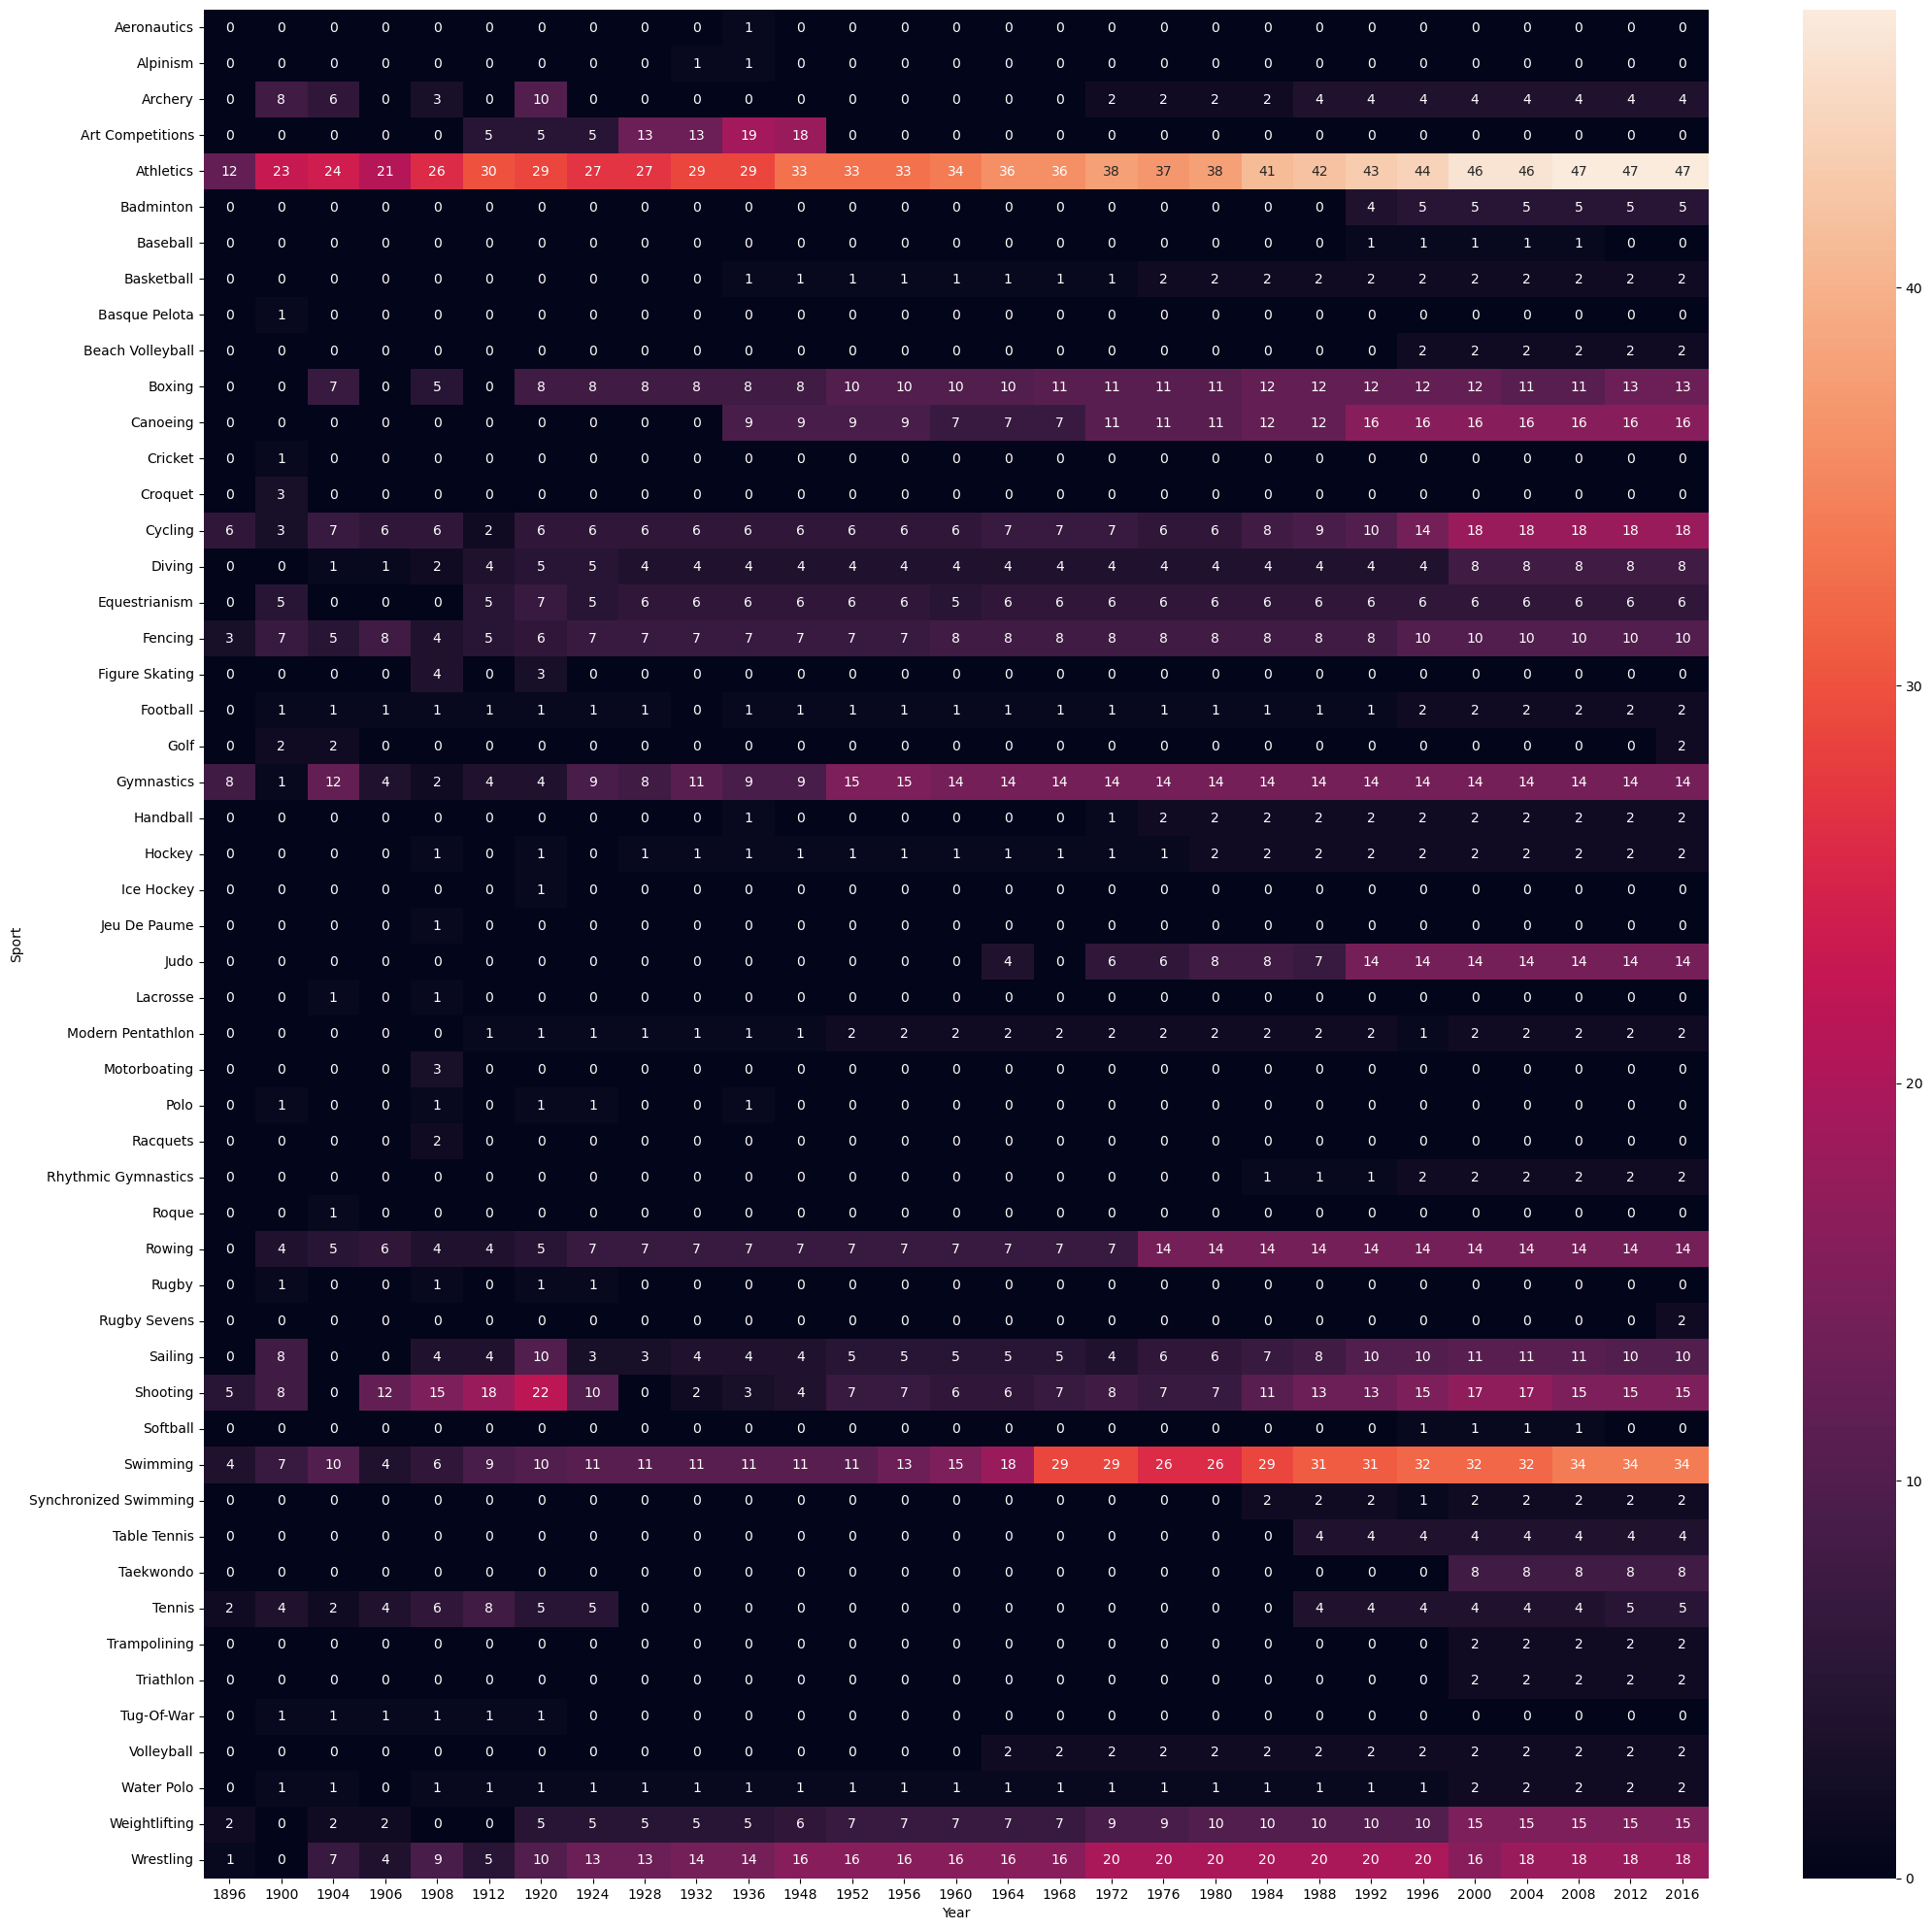

In [86]:
# It tells us about how many event conduct in every edition with different sports
plt.figure(figsize=(25,25))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int'),annot=True)

### Most successful athletes

In [ ]:
## here we first remove that rows that medal column is Nan then we some merge on both table

In [108]:
def most_successful(df,sport):
    temp_df=df.dropna(subset=['Medal']) # Here we remove that rows that has NaN medal
    
    if sport!='Overall':
        temp_df=temp_df[temp_df['Sport']==sport] #only that rows that have choosen sport
    x=temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='index',
           right_on='Name',how='left')[['index','Name_x','Sport','region']].drop_duplicates('index') # counts that particular athlete
    x.rename(columns={'index':'Name','Name_x':'Medals'},inplace=True)
    return x
    

In [109]:
most_successful(df,'Gymnastics')

,Name,Medals,Sport,region
0,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
19,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
43,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
67,Takashi Ono,13,Gymnastics,Japan
100,Sawao Kato,12,Gymnastics,Japan
124,Aleksey Yuryevich Nemov,12,Gymnastics,Russia
145,Viktor Ivanovych Chukarin,11,Gymnastics,Russia
161,Vra slavsk (-Odloilov),11,Gymnastics,Czech Republic
179,gnes Keleti-Srkny (Klein),10,Gymnastics,Hungary
193,Vitaly Venediktovich Shcherbo,10,Gymnastics,Russia


In [91]:
sport='Athletics'
temp_df=temp_df[temp_df['Sport']==sport]

In [92]:
temp_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
101,67,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,179.0,80.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver,Russia,NaN,0,0,1
129,86,Jos Manuel Abascal Gmez,M,26.0,182.0,67.0,Spain,ESP,1984 Summer,1984,Summer,Los Angeles,Athletics,"Athletics Men's 1,500 metres",Bronze,Spain,NaN,1,0,0
551,359,Andrey Khakimovich Abduvaliyev,M,26.0,190.0,125.0,Unified Team,EUN,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's Hammer Throw,Gold,Russia,NaN,0,1,0
577,379,Addis Abebe,M,21.0,160.0,50.0,Ethiopia,ETH,1992 Summer,1992,Summer,Barcelona,Athletics,"Athletics Men's 10,000 metres",Bronze,Ethiopia,NaN,1,0,0
635,411,Gezahgne Abera,M,22.0,166.0,58.0,Ethiopia,ETH,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Marathon,Gold,Ethiopia,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222526,135553,Galina Ivanovna Zybina (-Fyodorova),F,21.0,168.0,80.0,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Women's Shot Put,Gold,Russia,NaN,0,1,0
222528,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,Russia,NaN,0,0,1
222530,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,Russia,NaN,1,0,0
222544,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze,Russia,NaN,1,0,0


### Country wise Analysis

##### Country wise medal tally per year(line plot)

In [113]:
temp_df=df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_2716\1749264335.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [120]:
new_df=temp_df[temp_df['region']=='USA']
final_df=new_df.groupby('Year').count()['Medal'].reset_index()

In [121]:
fig=px.line(final_df,x='Year',y='Medal')
fig.show()

#### Country event heatmap

<Axes: xlabel='Year', ylabel='Sport'>

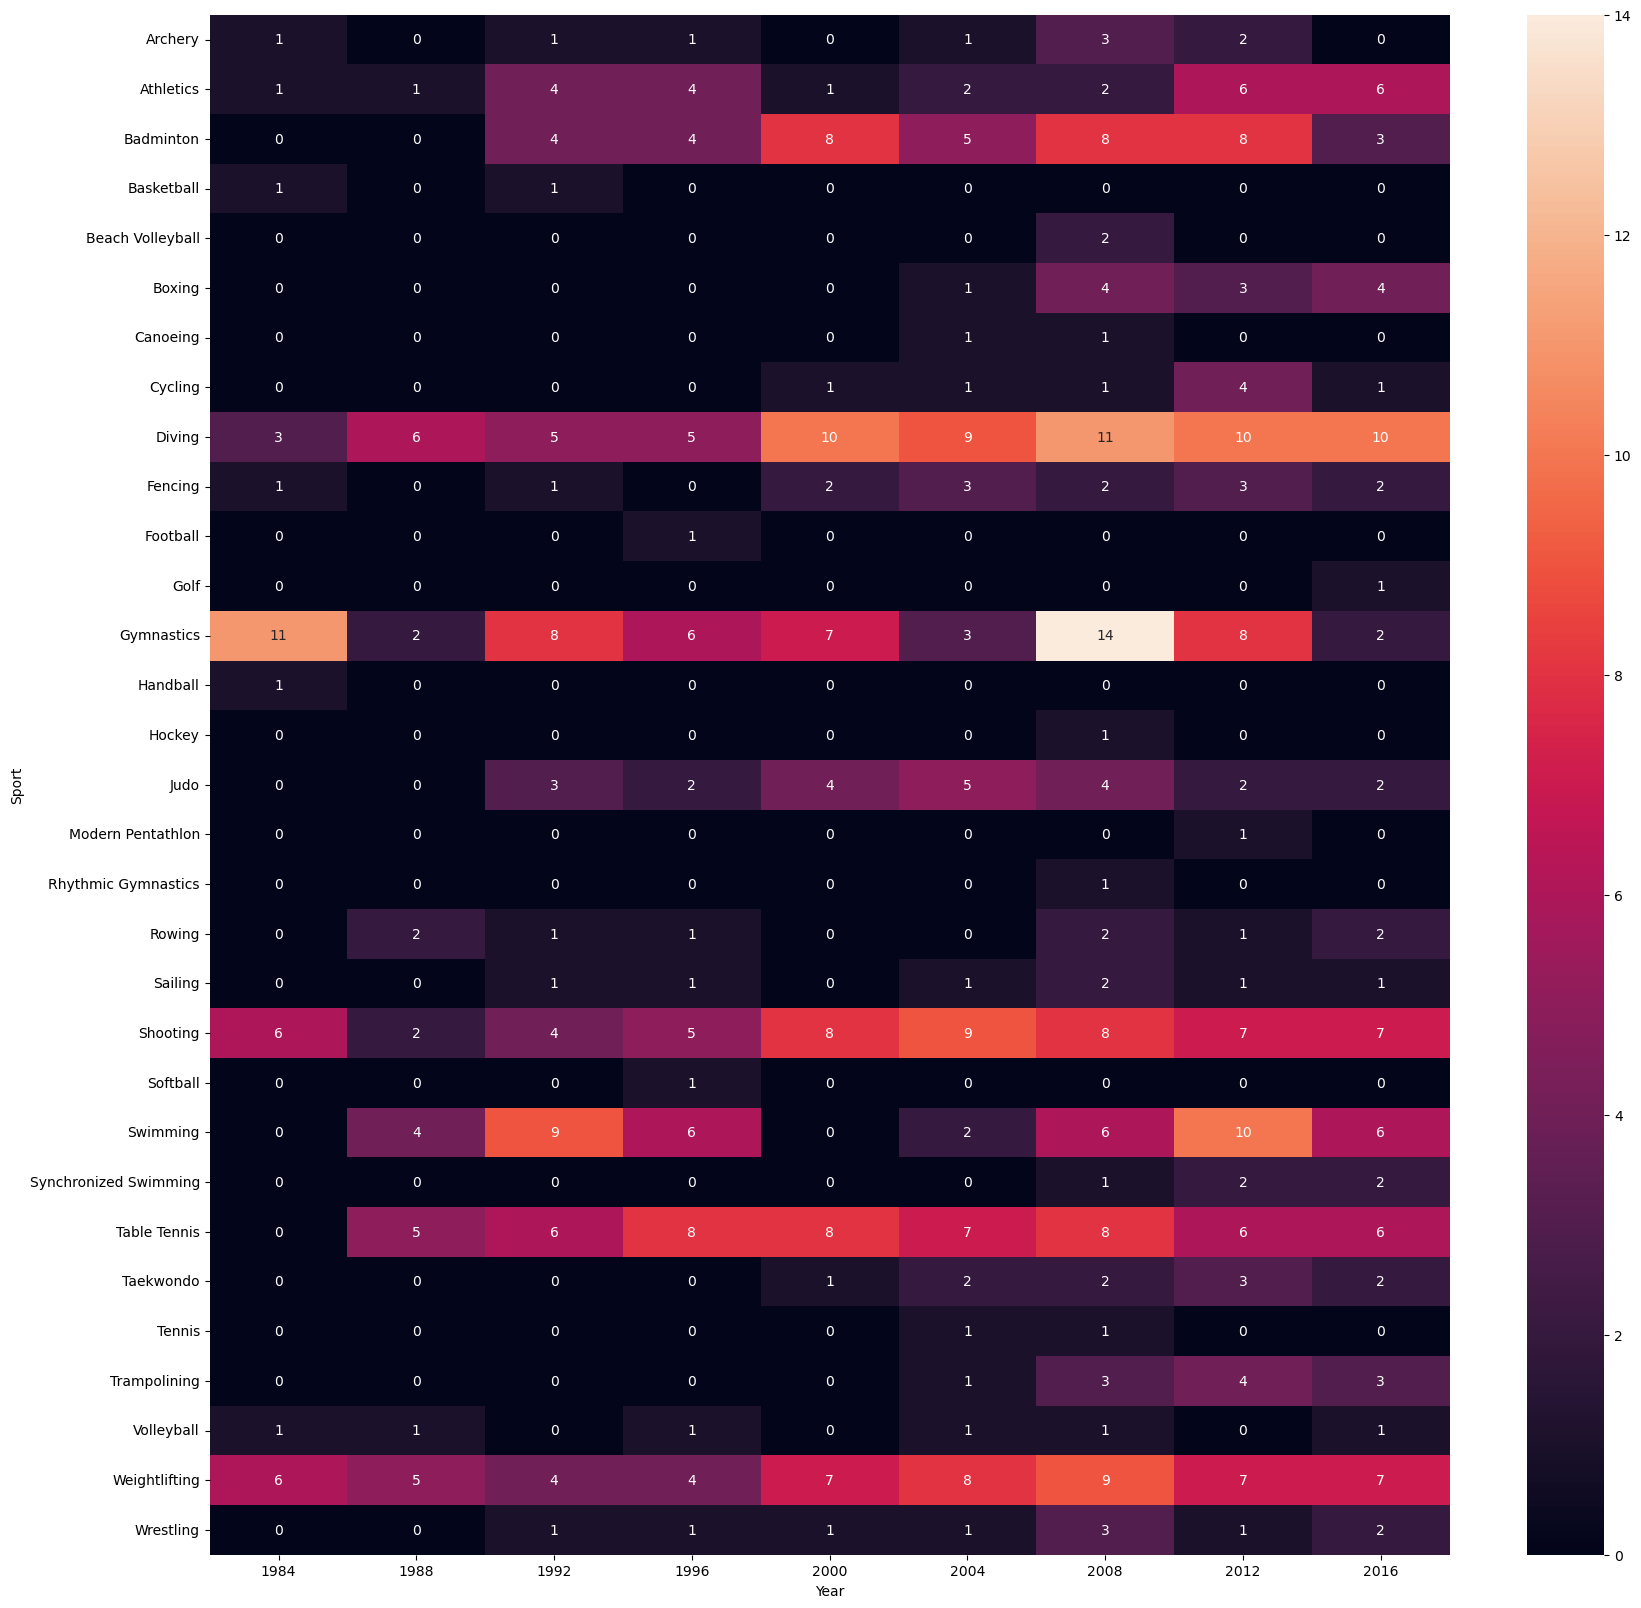

In [126]:
new_df=temp_df[temp_df['region']=='China']
plt.figure(figsize=(20,20))
sns.heatmap(new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0),annot=True)

### Top 10 athlete of every country

In [131]:
def most_successful_countrywise(df,country):
    temp_df=df.dropna(subset=['Medal']) # Here we remove that rows that has NaN medal
    
    temp_df=temp_df[temp_df['region']==country] #only that rows that have choosen sport
    x=temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='index',
           right_on='Name',how='left')[['index','Name_x','Sport']].drop_duplicates('index') # counts that particular athlete
    x.rename(columns={'index':'Name','Name_x':'Medals'},inplace=True)
    return x
    

In [132]:
most_successful_countrywise(df,'USA')

,Name,Medals,Sport
0,"Michael Fred Phelps, II",28,Swimming
30,Ryan Steven Lochte,12,Swimming
44,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming
61,Natalie Anne Coughlin (-Hall),12,Swimming
73,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming
86,"Matthew Nicholas ""Matt"" Biondi",11,Swimming
98,Carl Townsend Osburn,11,Shooting
114,Mark Andrew Spitz,11,Swimming
126,"Raymond Clarence ""Ray"" Ewry",10,Athletics
136,"Frederick Carlton ""Carl"" Lewis",10,Athletics


## Athlete wise analysis

In [143]:
import plotly.figure_factory as ff

In [144]:
athlete_df=df.drop_duplicates(subset=['Name','region'])

In [159]:
athlete_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [160]:
x1=athlete_df['Age'].dropna()
x2=athlete_df[athlete_df['Medal']=='Gold']['Age'].dropna()
x3=athlete_df[athlete_df['Medal']=='Silver']['Age'].dropna()
x4=athlete_df[athlete_df['Medal']=='Bronze']['Age'].dropna()

In [161]:
fig=ff.create_distplot([x1,x2,x3,x4],['Overall Age','Gold Medalist','Silver Medalist','Bronze Medalist'],show_hist=False,show_rug=False)
fig.show()

#### Age distribution in different sports

In [178]:
famous_sports=['Basketball',
 'Judo','Football','Tug-Of-War','Athletics', 'Swimming','Badminton', 'Sailing', 'Gymnastics', 'Art Competitions',
 'Handball', 'Weightlifting','Wrestling', 'Water Polo','Hockey', 'Rowing', 'Fencing', 'Shooting',
 'Boxing', 'Taekwondo', 'Cycling', 'Diving','Canoeing', 'Tennis', 'Golf', 'Softball',
 'Archery', 'Volleyball', 'Synchronized Swimming',
 'Table Tennis', 'Baseball','Rhythmic Gymnastics', 'Rugby Sevens',
 'Beach Volleyball', 'Triathlon', 'Rugby', 'Polo','Ice Hockey']

In [179]:
x=[]
name=[]
for sport in famous_sports:
    temp_df=athlete_df[athlete_df['Sport']==sport]
    x.append(temp_df[temp_df['Medal']=='Gold']['Age'].dropna())
    name.append(sport)

In [180]:
fig=ff.create_distplot(x,name,show_hist=False,show_rug=False)
fig.show()

### Athlete weight vs height

In [182]:
athlete_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [183]:
 athlete_df['Medal'].fillna('No Medal',inplace=True)

In [184]:
athlete_df.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
156837,95679,Aarne Anders Pohjonen,M,22.0,NaN,NaN,Finland,FIN,1908 Summer,1908,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Bronze,Finland,NaN,1,0,0
175885,107437,Richard Roland Schoon,M,28.0,NaN,NaN,Singapore,SGP,1956 Summer,1956,Summer,Melbourne,Hockey,Hockey Men's Hockey,No Medal,NaN,NaN,0,0,0
33357,20486,Tatyana Sergeyevna Chernova,F,20.0,189.0,63.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Heptathlon,Bronze,Russia,NaN,1,0,0
61895,37660,Renzo Furlan,M,22.0,175.0,70.0,Italy,ITA,1992 Summer,1992,Summer,Barcelona,Tennis,Tennis Men's Singles,No Medal,Italy,NaN,0,0,0
90289,55322,Alexander Johnson,M,27.0,183.0,73.0,Australia,AUS,1996 Summer,1996,Summer,Atlanta,Modern Pentathlon,Modern Pentathlon Men's Individual,No Medal,Australia,NaN,0,0,0


<Axes: xlabel='Weight', ylabel='Height'>

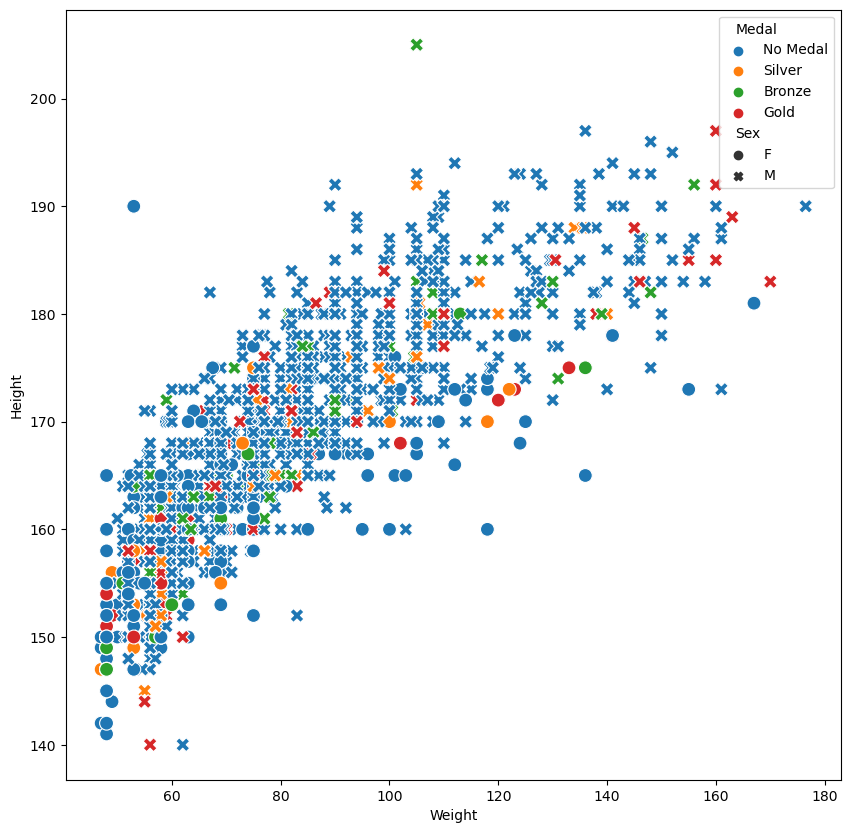

In [197]:
plt.figure(figsize=(10,10))
temp_df1=athlete_df[athlete_df['Sport']=='Weightlifting']  # for a particular sport
sns.scatterplot(data=temp_df1,x='Weight',y='Height',hue='Medal',style='Sex',s=100)

### Men vs women

In [199]:
men=athlete_df[athlete_df['Sex']=='M'].groupby('Year').count()['Name'].reset_index()
women=athlete_df[athlete_df['Sex']=='F'].groupby('Year').count()['Name'].reset_index()

In [202]:
final=men.merge(women,on='Year',how='left')
final.rename(columns={'Name_x':'Male','Name_y':'Female'},inplace=True)

In [203]:
final.fillna(0,inplace=True)

In [204]:
fig=px.line(final,x='Year',y=['Male','Female'])
fig.show()